# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [0, 100, 227]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,11594,7779,12144,3252,8035,3029
2,4042,2204,1563,2286,263,689


In [4]:
data.mean()

Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicatessen         1524.870455
dtype: float64

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

The first two data samples seem to be average size customers, although there are some differences between these two samples and the "average" customer.  Both of these samples seem to specialize in certain types of categories.  Given the statistics of the overall data, the first two samples are probably small or mid-sized grocery stores.  Both of these samples seem to have different specialties.  For instance, sample 1 has much higher spending in the Detergents_Paper and Grocery categories (well above average in both, 8035 vs 2881.5 and 12144 vs 7951 respectively.)  Sample 0, however, spends slightly below in both the Detergents_Paper and Grocery categories while spending more in than average in the Milk category (9656 vs 5796.)

The third sample is more interesting since it falls in the bottom quartile in all categories.  From the numbers this last sample might be something like a corner/convenience store where certain goods aren't carried in bulk and the sales volume is lower.  This sample spends the most in the Fresh category, even though the amount spent is significantly lower than average (4042 vs 12000.)  The next highest category is Frozen, which only slightly lower than the average (2286 vs 3072) and then Milk (which less than half the average at 2204 vs 5796.)

Below is an output of the difference of each sample from the average.

In [5]:
samples - data.mean().astype(int)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,669,3860,-390,-2857,-207,-186
1,-406,1983,4193,181,5154,1505
2,-7958,-3592,-6388,-785,-2618,-835


### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [6]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop('Detergents_Paper', axis=1)

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data, data['Detergents_Paper'], train_size=.75, test_size=.25,
                                                   random_state=0)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)

In [7]:
score

0.66013062410619716

### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

I attempted to predict the 'Detergents_Paper' feature.  After realizing that I had to set random_state to some fixed value, the prediction score seems to have settled in the .65 - .74 range, with an average r^2 of ~.695.  Finally, after setting the random_state for the DecisionTreeRegressor (as recommended by one of the reviewers) the score consistently comes back as .66.  From my understanding of r^2 (the closer to 1 the better the fit) this means that the 'Detergents_Paper' feature has some predictive value.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

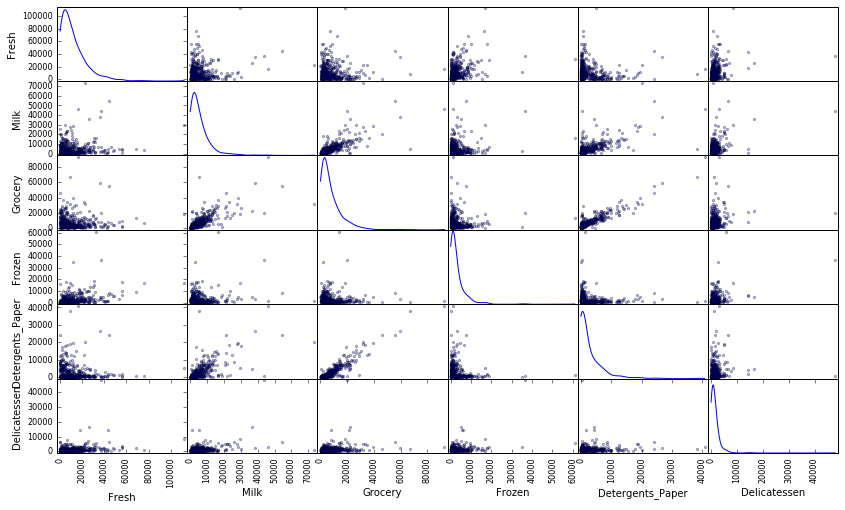

In [8]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

The ('Grocery', 'Detergents_Paper'), ('Milk', 'Grocery'), and ('Milk', 'Detergents_Paper') pairs seem to be correlated.  The strongest of these correlations is the first pair.  This confirms the above assessment that 'Detergents_Paper' feature is predicitive.  

In fact, when I first ran the scatter matrix I was surprised that my chosen feature was an important feature in the underlying data structure.  After consulting the decision tree regressor documentation [1] and clarifying my understanding of r^2 (thanks to the initial project reviewer), it became clear that the 'Detergents_Paper' was in fact predictive.

The data does not look to be normally distributed (there seem to be some clear patterns, specifically in the previouly mentioned pairs.)  Most of the data in the above graphs seem to be clustered, some along the x-axis and some along the x & y axis (forming an arrow type pattern pointing to the origin.)  The previously mentioned pairs do a fairly good job of making line moving up & to the right.

[1]: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor.score
1: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor.score


## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

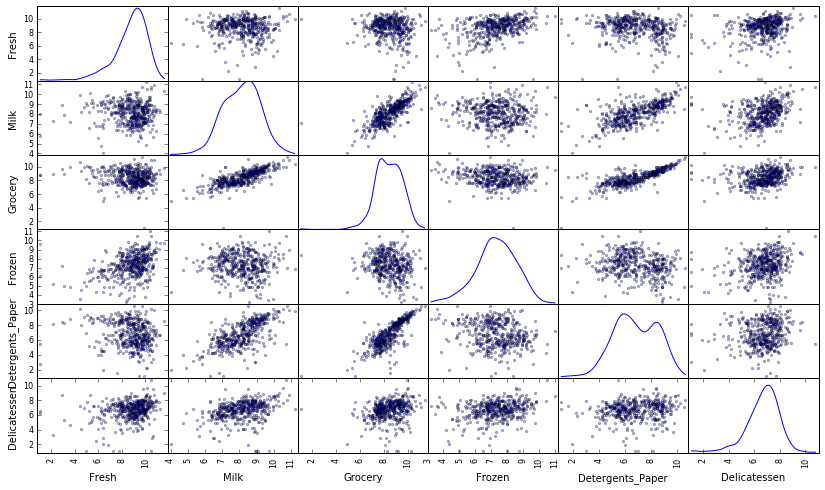

In [9]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [10]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,9.358243,8.959183,9.404590,8.087025,8.991562,8.015988
2,8.304495,7.698029,7.354362,7.734559,5.572154,6.535241


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [11]:
log_data.keys()

Index([u'Fresh', u'Milk', u'Grocery', u'Frozen', u'Detergents_Paper',
       u'Delicatessen'],
      dtype='object')

In [12]:
# For each feature find the data points with extreme high or low values
dct = {}
for feature in log_data.keys():
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    dct['%s' % feature] = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = []

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113b9acd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x113aafc10>]], dtype=object)

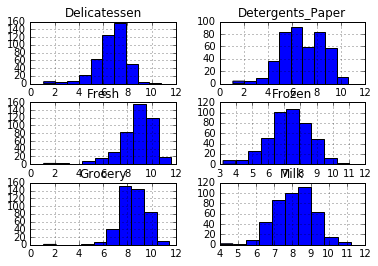

In [13]:
log_data.hist()

### Question 4
*Are there any data points considered outliers for more than one feature? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

In [20]:
# idx = []

In [21]:
# for feature in log_data.keys():
#     idx += log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.tolist()

# print(sorted(idx))

[4, 9, 12, 13, 14, 18, 20, 22, 23, 23, 23, 24, 28, 28, 29, 30, 32, 33, 36, 38, 39, 40, 41, 43, 45, 45, 46, 47, 47, 47, 47, 49, 49, 52, 54, 56, 56, 56, 57, 61, 61, 61, 61, 65, 65, 65, 65, 66, 66, 67, 71, 71, 73, 75, 75, 75, 77, 83, 85, 85, 85, 86, 86, 86, 86, 87, 89, 92, 92, 92, 93, 95, 96, 103, 103, 109, 109, 111, 112, 114, 118, 120, 122, 124, 125, 126, 127, 128, 129, 137, 140, 141, 142, 142, 142, 144, 145, 145, 145, 149, 152, 154, 154, 155, 157, 161, 163, 165, 171, 171, 173, 176, 177, 181, 181, 181, 183, 183, 183, 183, 183, 184, 187, 191, 193, 196, 196, 200, 201, 202, 203, 204, 205, 210, 211, 211, 211, 216, 217, 218, 226, 232, 233, 237, 237, 239, 240, 241, 242, 251, 251, 251, 253, 254, 255, 258, 259, 262, 265, 266, 267, 268, 273, 276, 279, 282, 283, 284, 285, 285, 289, 289, 289, 294, 296, 301, 304, 306, 307, 309, 311, 312, 319, 319, 324, 325, 325, 331, 332, 333, 333, 335, 338, 338, 343, 343, 347, 349, 351, 353, 356, 356, 357, 357, 358, 360, 368, 369, 370, 371, 377, 380, 381, 382, 384,

**Answer:**

With the above outlier calculation a number of outliers were identified for each feature with the data points 65, 66, 75, 128 being repeated.  Not being 100% confident with these data points I looked at the historgrams for each feature to better understand the data.  The outliers seem to mostly be at the lower end of the distribution.  These outliers are most likely smaller customers.  I chose to *not* remove these outliers since it is not yet clear, at this stage, what the customer segments are.

As we discover below, these outliers become essential in correctly identifying the customer segments.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

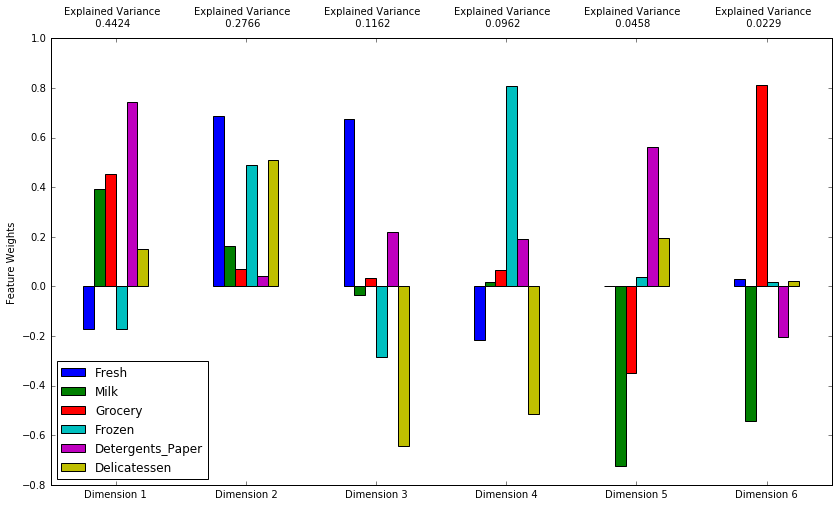

In [14]:
from sklearn.decomposition import PCA
# TODO: Apply PCA to the good data with the same number of dimensions as features
pca = PCA()
pca.fit(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = PCA()
pca_samples.fit(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

The first & second principal components explain ~.719 of the variance in the data.  The first four principal components explain ~.9314 of the variance in the data.

The first prinicpal component (P.C.) suggests that customers who spend on Detergents_Paper, Milk, & Grocery categories will be higher spending customers (the Detergents_Paper category being the driving factor here.)  The first P.C. is unsurprising as this was fairly evident in the initially visualizations.  In the first P.C. all the categories except Fresh & Frozen have positive weights, these two exceptions had negative weights.  The 2-4 P.C.s are much more interesting.  The second P.C. suggests that customers who spend on the Fresh, Frozen, & Delicatessen categories will tend to be higher spending customers; if we look at the original visualization we see that the customers who spend on these combinations, although not highly correlated, tend to cluster up and to the right of the relevant graphs.  All categories in the 2nd P.C. are postively weighted (which is unique among the rest of the P.C.s.)  The third P.C. is equally interesting (assuming my interpretation is correct), the visualization of P.C. 3 seems to suggest that customers who spend on the Fresh category, but do not spend on the Delicatessen & Frozen categories will **not** be high spending customers (essentially, these customers are the opposite of those in P.C. 2.)  In the 3rd P.C. the Delicatessen category has a high negative weight while the Fresh category has an equally high positive weight (in fact the categories alternate between positive & negative weights and are almost mirror images of one another.)  Finally, the P.C. 4 customers are ones that spend on Frozen, but not on Delicatessen & Fresh.  This P.C. is harder for me to interpret as it seems as these data points are much more spread out and is difficult for me to draw conclusions from.  In P.C. 4 the Frozen category has a very strong positive weight while Delicatessen & Fresh have negative weights (with minor, positive contributions from the remaining categories.)

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [15]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples.components_, 4), columns = pca_results.index.values))
#An error kept being thrown when using just pca_samples, so I used the .components_ attribute to get the actual numbers.

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-0.2603,-0.3212,-0.4498,0.1542,-0.7230,-0.2832
1,0.0925,0.1497,-0.0487,-0.9428,-0.1910,-0.2033
2,-0.0621,-0.4959,0.2311,-0.2124,-0.2474,0.7684


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [16]:
# TODO: Fit PCA to the good data using only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Apply a PCA transformation the good data
reduced_data = pca.transform(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [17]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,1.7510,0.0705
1,2.3702,1.7971
2,-1.5856,-0.3418


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

K-Means, is simple to implement and works well with large datasets.  K-Means, however, is very dependent on it's starting point and can get stuck at local optima.  GMM is good for density estimation, but does not scale well as GMM requires more calculations than K-Means.

Given the dataset, I've opted to use K-Means.  Primarily because of it's simple implemenation.

Sources:

http://scikit-learn.org/stable/modules/clustering.html

http://stats.stackexchange.com/a/133694/90327

https://classroom.udacity.com/nanodegrees/nd009/parts/0091345406/modules/542278935775460/lessons/5455061279/concepts/6381886660923

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# TODO: Apply your clustering algorithm of choice to the reduced data 
for i in xrange(2, 9):
    clusterer = KMeans(n_clusters=i).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, labels=clusterer.labels_)
    print round(score, 4)

0.4192
0.3928
0.3298
0.3498
0.3603
0.3651
0.3571


In [21]:
clusterer = KMeans(n_clusters=2).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Find the cluster centers
centers = clusterer.cluster_centers_

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

The silhouette scores in order from 2 to 8 are:
0.4192
0.3928
0.3298
0.3498
0.3603
0.3651
0.3571

With two clusters we have the densest and most well separated clusters.  The silhouette score for 2 clusters is ~0.4197

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

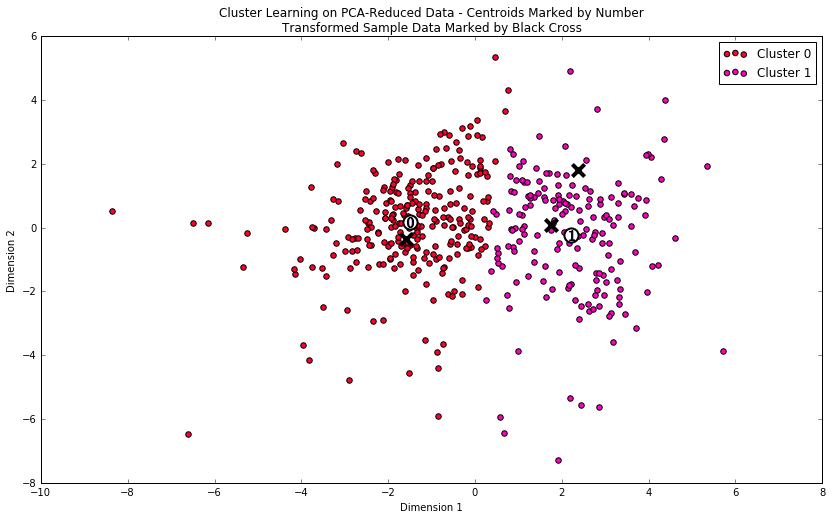

In [22]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [23]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8994.0,1909.0,2366.0,2081.0,290.0,681.0
Segment 1,3570.0,7749.0,12463.0,900.0,4567.0,966.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

The "average" Segment 0 customer sell significantly more in the Grocery (12463), Detergents_Paper (4567), & Milk (7749) categories than Segment 1 customers and are above the mean (respectively: 7951.28, 2881.5, 5796.27) in these categories for all customers.  Segment 1 customers do not exceed the mean in any category, but do out sell Segment 0 customers in the Fresh (8994 vs. 3570) & Frozen (2081 vs 900) categories.  It seems that Segment 1 customers specialize in fresh/pre-packaged foods, possibly small corner/bodega type stores, while Segment 0 customers are more traditional grocery/super markets.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [24]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


In [25]:
display(samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,11594,7779,12144,3252,8035,3029
2,4042,2204,1563,2286,263,689


**Answer:**

The predictions above comport with the previous answer when the three samples were chosen.  In the answer above, I suggested that the first two samples would be small/average sized grocery stores while the last sample would be a corner/convenice store.  The predicted segment for the samples is consistent with the speculation from above.  Sample points 1 & 2 share the characterstics of their respective segments, although point 2 seems to be smaller the average segment 1 customer.  Point 2, however, still sells more in the Fresh & Frozen categories than any other category by a considerable amount and this is consistent with Segment 1 customers.

Sample point 0 is a bit less clear.  Point 0 sells a significant amount of the Fresh category unlike the rest of segment 0 customers.  Point 0, however, does have some general characteristics that are somewhat consistent with segment 0 outside of the Fresh category.  Point 0 sells more of the Milk, Grocery, and Detergents_Paper cateogories than it does in the Frozen & Delicatessen categories.  Outisde of the Fresh category, point 0 seems to be consistent enough with segment 0 to include it in this cluster.

## Conclusion

### Question 10
*Companies often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services. If the wholesale distributor wanted to change its delivery service from 5 days a week to 3 days a week, how would you use the structure of the data to help them decide on a group of customers to test?*  
**Hint:** Would such a change in the delivery service affect all customers equally? How could the distributor identify who it affects the most?

**Answer:**

Given that the two customer segments tend to specialize in different categories, while still carrying product from all categories, any changes would not affect customers equally.  If the distributor was to reduce deliveries to 3 days per week they would have to be much more strategic in what they deliver.  The nature of the different categories would play into how these deliveries would be made as well.  Fresh food categories would have to be delivered more frequently, where non-perishable & packaged goods can be stocked up and won't require frequent deliveries.  Instead of focusing on the different customer segments it might be more feasible to focus on the categories of goods delivered.  

The distributor would have to assess if they could deliver as much of each category of goods with the reduced number of deliveries.  Can the distributor make all of the non-perishable/packaged goods deliveries in one day to both customer segments and spread the fresh/perishable goods delveries over two days?  These are the assessments that need to be made before reducing the number of deliveries made.

A possible A/B test would be to select 10% of the customer base comprised of both customer segments and switch their deliveries to the above mentioned breakdown (once/week for non-perishables & packaged goods and twice/week for fresh & perishables.)  It is key to make sure that the breakdown of the 10% tranche of customers chosen is similar to the overall makeup of the dataset (roughly 3:2 segment 1 to segment 0.)

### Question 11
*Assume the wholesale distributor wanted to predict a new feature for each customer based on the purchasing information available. How could the wholesale distributor use the structure of the data to assist a supervised learning analysis?*  
**Hint:** What other input feature could the supervised learner use besides the six product features to help make a prediction?

**Answer:**

A category defining what type of establishment the customer is would be beneficial.  Different types of establishments have different needs (i.e. convenience store vs grocery store, restaurant vs coffee shop, etc.)  Understanding the differing needs of the customer types would help in identifying which customers spend more and what types of goods they are most in need of.

For instance a new feature called 'type', which will categorize the type of customer, can be determined by whether or not they purchase more of a combination of Detergents_Paper/Milk/Grocery categories vs a combinantion of Fresh/Frozen categories.  So the 'type' predicted by Detergents_Paper/Milk/Grocery could be 'grocery_store' and Fresh/Frozen could be 'convenience_bodega'.  Predicting the 'type' could inform the distributor when deliveries from different categories should be made (e.g. deliver to 'convenience_bodega' customer Fresh/Frozen twice/week & Detergents_Paper/Milk/Grocery once every other week.)

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier on to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

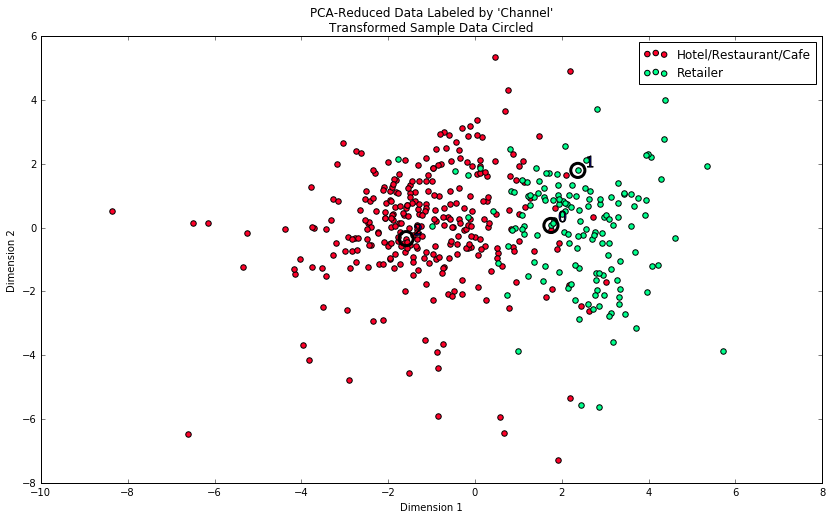

In [21]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

The underlying distribution of the two segments fits very well with the real customer segments.  The Hotel/Restaraunt/Cafe makes the category sales numbers of Segment 1 more understandable.  These are mostly consistent with the previous definitions.  The mischarcterization of Segment 1 is where the deviation between the real segment definition and my own is.  The way Segment 1/HoReCa spend makes much more sense now that we know what type of customer they are.  However, the thought process of servicing these two customer segments under the 3 day a week delivery regime still stands since it wasn't necessarily focused on the type of customer, but the category of goods being delivered.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.